In [1]:
from methods import *
import matplotlib.pyplot as plt
from PIL import Image

# Obtener los datos de la tabla

Cómo obtener la tabla de asistencia

In [2]:
f3 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato3.pdf"
f3_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 3/10749/Abril.pdf"

In [3]:
doc = fitz.open(f3_error)
list_blocks = get_info_in_blocks(doc)

In [4]:
parse_blocks(list_blocks)
list_blocks

['15/12/22, 14:21 .:SIGE:. Ministerio de Educación',
 'https://sige.mineduc.cl/Sige/Sep/IngresoAsistenciaSep 2/2',
 'Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '1  Aguirre Tenorio Angelo',
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 '5',
 '2  Arias Astudillo Ignacia',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 -1,
 '13',
 '3  Astete Peñaloza Juan',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '16',
 '4  Astudillo Acosta Efraín',
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 '1',
 '5  Bravo Pavez Andy',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1

In [5]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")

meta_data = []
i = 0
while i < len(raw_data):
    element: list[str|int] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3","-5""]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

print(meta_data)

SyntaxError: unterminated string literal (detected at line 13) (2066511685.py, line 13)

In [ ]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")
a = " ".join(list(map(lambda x: " ".join(x),raw_data))).split()

# Encuentra donde inicia los datos de la tabla
c = 0
for i,value in enumerate(a):
    if value.isnumeric() and a[i+1].isalpha():
        if int(value) == 1:
            c+=i
            break
matrix = {}
data = []
name = []
n_days = 30

for value in a[(c+1):]:
    
    if len(data) == n_days:
        matrix[" ".join(name.copy())] = np.array(data.copy())
        name.clear()
        data.clear()    
    
    elif len(name) != 0 and value in ["-5","-3","-2","-1","0","1"]:
        data.append(value)
    
    elif value.isalpha() and value not in ["-5","-3","-2","-1"]:
        name.append(value)
    
k =pd.DataFrame(matrix).T
k.columns = 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Aguirre Tenorio Angelo,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,1,0,-1
Arias Astudillo Ignacia,1,-1,-1,1,1,1,1,1,-1,-1,...,0,0,-1,-1,1,0,0,0,0,-1
Astete Peñaloza Juan,1,-1,-1,1,1,1,1,0,-1,-1,...,0,1,-1,-1,1,1,1,1,1,-1
Astudillo Acosta Efraín,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,0,0,-1
Bravo Pavez Andy,1,-1,-1,1,1,1,1,1,-1,-1,...,1,0,-1,-1,1,1,1,1,1,-1
Bustos Apolinario Alondra,1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,-1,-1,1,1,0,1,1,-1
Cáceres Armijo Lucas,1,-1,-1,1,1,1,1,1,-1,-1,...,0,1,-1,-1,0,0,0,0,0,-1
Carrasquero Matos Fabiola,0,-1,-1,0,1,1,1,0,-1,-1,...,1,0,-1,-1,1,1,0,1,0,-1
Cayuqueo Labrín Florencia,1,-1,-1,1,1,1,0,0,-1,-1,...,0,0,-1,-1,0,0,0,0,0,-1
Contreras Garcia Lirimar,1,-1,-1,0,1,1,1,1,-1,-1,...,1,1,-1,-1,1,0,0,1,1,-1


In [ ]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")


pd.DataFrame(matrix_dict).T            

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Aguirre Tenorio Angelo,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,1,0,-1
Arias Astudillo Ignacia,1,-1,-1,1,1,1,1,1,-1,-1,...,0,0,-1,-1,1,0,0,0,0,-1
Astete Peñaloza Juan,1,-1,-1,1,1,1,1,0,-1,-1,...,0,1,-1,-1,1,1,1,1,1,-1
Astudillo Acosta Efraín,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,0,0,-1
Bravo Pavez Andy,1,-1,-1,1,1,1,1,1,-1,-1,...,1,0,-1,-1,1,1,1,1,1,-1
Bustos Apolinario Alondra,1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,-1,-1,1,1,0,1,1,-1
Cáceres Armijo Lucas,1,-1,-1,1,1,1,1,1,-1,-1,...,0,1,-1,-1,0,0,0,0,0,-1
Carrasquero Matos Fabiola,0,-1,-1,0,1,1,1,0,-1,-1,...,1,0,-1,-1,1,1,0,1,0,-1
Cayuqueo Labrín Florencia,1,-1,-1,1,1,1,0,0,-1,-1,...,0,0,-1,-1,0,0,0,0,0,-1
Contreras Garcia Lirimar,1,-1,-1,0,1,1,1,1,-1,-1,...,1,1,-1,-1,1,0,0,1,1,-1


In [ ]:
# Si la lista esta bien creada
dict_tabla: dict[str, np.ndarray] = dict()
list_aux = []
key_aux = ""
for value in meta_data:
    if type(value) == int:
        list_aux.append(value)
    elif type(value) == str:
        if key_aux == "":
            key_aux = value
        else:
            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
            list_aux.clear()
            key_aux = value
for key, value in dict_tabla.items():
    dict_tabla[key] = np.delete(value,-1)
print(dict_tabla)

NameError: name 'meta_data' is not defined

In [ ]:
# Confirmamos que la tabla sea cuadrada
try:
    df = pd.DataFrame(dict_tabla)
    print(df)
    if np.unique(df.count().to_numpy()).shape[0] == 1:
        print( np.unique(df.count().to_numpy()))
        df = df.T
        df.columns = np.array([date(2022, 4, 1)+timedelta(days=i)
                              for i in range(PARSE_STR_MONTH_TO_DATA["Abril"][1])])
    else:
        print("error")
except:
    list_error = []
    for x in dict_tabla.values():
        list_error.append(x.shape[0])
    print(set(list_error))

Empty DataFrame
Columns: []
Index: []
error


In [ ]:
df

""


# Formato 2

In [ ]:
f2 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato2.pdf"
f2_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 2/10087/SIGE asistencia abril 4to.pdf"

In [ ]:
doc = fitz.open(f2_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)

def slice_for_word(lista:list[str|int] ,word:str)->list[list[str|int]]:
    for i, value in enumerate(lista):
        if type(value) == int:
            continue
        if word in value:
            return [lista[:i],lista[i:]]
                 
a, b = slice_for_word(list_blocks,"Alumnos")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x16\x00\x00\x00\x15\x08\x02\x00\x00\x00\xcdB\x89\xc2\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00zIDATx\x9c\xed\x94a\n\xc0 \x08\x85=mw\xf2N\xde\xc99]\xac\x88\xd4\xb6\xfe\x0c\xf6\x08\t\x93\xe7\xc7\xfb\x11\xb0\x8a\xac\xd2\xda\xdd\x04\x1b,\xa4uu\xe9|X\xbb\xeb\xa9\x14\xf4\xa4v\x14\xe6\x8d\x88\xa5\x14\xbf\xb6,=\x85V\x99\x00WT\xb7O\xb3\x90=2\xc7s\xc9\x00\xfbY\x18\x85cqS8Y$)\x82,R\x14M\xf3\xcfb\xa0\xe0\x8dYP\xa4 \x8b\xa4\xbc,>\xfd_\xbc\xb78\x00\xf5\xed\xc2\xa9\xff\xa3~$\x00\x00\x00\x00IEND\xaeB`\x82'


In [ ]:
parse_format3(b,10087,"Abril")

5
6


,RBD


# Formato 1

In [ ]:
f1 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato1.pdf"
f1_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 1/10270/abril__SIGE_. Ministerio de Educación.pdf"

In [ ]:
doc = fitz.open(f1_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)
a, b = slice_for_word(list_blocks,"Detalle")
c, d = slice_for_word(b,"Alumnos")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x81\x00\x00\x00v\x08\x02\x00\x00\x00`Ug\xa6\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x14\\IDATx\x9c\xed\x9d}lT\xe7\x95\xc6\xadv\xff\xd8\xaaR+\xb5\xfb\xa1U+Uj\xd4VYU\xc8\xb11c\xbc,\xa0\xddB\x10\xd9\xcd\xd6 \'5k\x07\xbc\x0e\x84$\x149\xcd\x92d\xa3F\x89\x9a\x14\x05"(j\x12%ip\xc0\x08\xb2\x81-t\x02\x06\x9b\xf0e>\x85\xa9\x03a\xf3U\xcc\xda\xb8&\xe3a\xec\xf1\xd8c\xcfx<\x9e\x19\xb3\xbfs\xcf\xf506\xfe\x18\x83\x93\x0b\xf1\x8b\x8eF\xf7\xbe\xf7\xbd\xef\xbd\xf3<\xe7<\xe7\x9c;F7\xe3\xeb\x8f\xee\xcb(q\xdf\x9a\xf6\x8fE\xafz3\xb3\xbcwe\x7f\xbe\xf6\x05\\bd\x0b<\xb2"\xe3\xaf\x1e\xdf\xff\x95\xe5{nA\xcbx\xa4\x1a\x0e\x02\xd3\xa7\xfb\xf2\xfe\xe1J\xde\x8c/\xabu\xfc\xe2?\r\x07\x86\x03\xc3\xc1\x04r\x90\xb1lO\xc6\x83\xbbm)_\xecf\xdbp\x90>\x07\xd5#\x03Q\x99\x1e^\x95 Nn\xff\xfb_\x1e\xfe\x97\r\xa7\xd7W_\xfcue\xfd\x0f\x9e>t\x934\x18\x0e\xc6\xe7\xfb\xd9\xbf:\xfaIs\xa7?\x18ih\t^\xb5\xfe\xbd\xfb~KF\xa9u\x14[f8\x18\x83\x83\x1b\xd4"!`\xd9\x

In [ ]:
d

['Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '1  Arredondo López Dominique',
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 '12',
 '2  Arredondo Valle Antonia',
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 0,
 -1,
 '14',
 '29/12/22, 10:38 .:SIGE:. Ministerio de Educación',
 'https://sige.mineduc.cl/Sige/Sep/IngresoAsistenciaSep 2/2',
 'Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '3  Barbera Martinez Angel',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '19',
 '4  Cabello Avendaño Máximo',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,


In [ ]:
# Clean list data of unless data
raw_data = list(map(lambda x: str(x).split(), d))
meta_data = []
i = 0
while i < len(raw_data):
    element: list[str] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3"]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

meta_data    
#dict_tabla: dict[str, np.ndarray] = dict()
#list_aux: list[int] = []
#key_aux: str = ""
#for value in meta_data:
#    if type(value) == int:
#        list_aux.append(value)
#    elif type(value) == str:
#        if key_aux == "":
#            key_aux = value
#        else:
#            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
#            list_aux.clear()
#            key_aux = value
#for key, value in dict_tabla.items():
#    dict_tabla[key] = np.delete(value,-1)


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -

In [ ]:
o = parse_format3(d,9993,"Octubre")
o

5
6


,RBD


# Ver imagenes apartir de sus bytes 

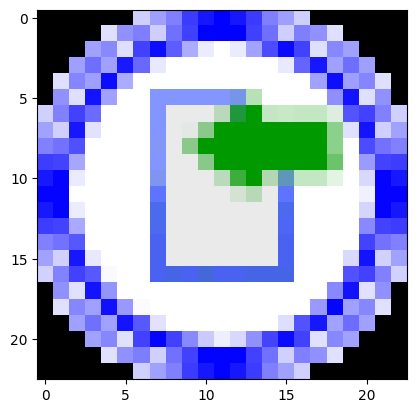

In [ ]:
bytes_img1 = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x17\x00\x00\x00\x17\x08\x02\x00\x00\x00oHC\xf7\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x02\x9fIDATx\x9c\x8dTKK[A\x18\xbd>V>@T|l\xfaG\x12\xc1G(\x14RP\x11t\x91E)\xb6\x84FD\xa5\xd0\x95QS\xd4h\x16\xba\xd0\x9a\xe0\xc2\xc7B\x10\xa5\x1b\x17\x06]Z\xb0\xba\xd1\xa0P#\xc5H\xb4\x98\xaa\xa4)\xb4\x8b\xb89=\x1fs\x93\xdc\x9b\xdc\xa2\x87a\xee\xe4\x9bsN\xe6\x9b\xc7\xa7i\x058:\xc2\xd2\x12FF`\xb3\xa1\xae\x0eEE\xd2s\xcc\x08\xe3\x9c-\x94\x98\x10\x8bav\x16^\xafP\x07\x06\xd0\xdc,\x16\xaaq\xcc\x08\xe3\x9c%\x87Lk\x8b\xe5e\xf8\xfd2\xdd\xd2\x82\x8a\n\xb8\\\xd8\xdc\xc4\xfd=\x88\xbb;\xac\xae\xc2\xe9DY\x99\xcc\x9239\t\xf2\xf3-\xb8\xd4\xfe~\x99hl\x84\xdb\x8dD\x02\x96`\xbc\xb7\x17\xf5\xf5\xc2$\x9f*S"\xe3\xe3\x12*/\xc7\xc6\x86\xb5\xde\x88\x95\x15TV\n\x9f\xaa\\j*\xcf\x9a\x1a\x99V\xf88oj\x1f\xe6o\xb6\xe3\xdbF\xa3\x99\x19\xe1\xab}\x14\x8b\xe3c\x8c\x8dI\xb6\x1eO\x8eD\xe5m\x06;\xd1\x9dgA\x9b\x16\xd2\xf6n\xf6\xf6\x7f\xee\xb3g\xfb\xfe+\xd6\xd5%*j\xe9\xa0\xf1\xff\xf9a\xaa\xf1x\xbe\xcbu\xe2:p\x10\xa0\xbe\xb0\x05"\x81\xcbK\xd4\xd6\x8a\x96\x0e\x1a\xcd\x86\x86\xd0\xden\xca\xdc\xb7\x90\xa6\xcb\xf4\xc1\xb4\xa5\x85r!\x8d\xa7F-\x1d\xb4\xa6&\xb4\xb6bm\xcd\xe4\x92\xcd\xc8\xff\xd5o\xe9\xe2\xf9"\xf9/.\x8a\x96\x0eZC\x03JJ\xe4F\x18\xe1\xfd\x94\xca\xee\xcb\xee\xf9\xae\xfd\xb3\x9d\xca\xado[\xaf\x16\xc2j_\xae\xfe\\\x91vv&Z:h\xfc\xb0\xe5\xc1\xf5>\xb7\xbb\xc4I\xfc$\x1c\rs\xc0\xb8\x11\xa9\x14\x94\\_\x8b\xba\xa3Y8\xdf%o\xad\xc0\xb8\x91vz\x9aY\x8b\xda\x97\xf5\xf5\'\xb9\xbc|\xfb\xd7H\x9b\x9a\xca\xec\x8b:\xa3\xeen\x93\xcb\x8b\xd7\xbf-]\x187\xd2\xda\xda2g\xc4\xd3\x8eD\xe4\xed\x1b\xdf\xceS\\\xa2Q\xb9\xbe\xd4\xca}\xe1\xc7\xe7\x93[\xd8\xd3\x83t:\xe7\xf2\xfc\xcd\x0f\xf6\x0e\xf79{\xf5S\xb5\xacKG\x87~w\xe9\xa0\xbf#^D\x1a\xcf\xcd\xe5\x1f\xd6\xff\xc0\x1aR]-*\xfd\x1d\x11\xfc11!\x8f\xbd\xaa\n\xc1 \x1e\x1e\x1e\xb1\x08\x85PZ*|\xaa\xa85\x95(\x962f\xc8\x1515\xe3\x9b2\xe2\xe2\x02\x9d\x9d\xb2\x89d\xf6\xf5Y\x15*N(of\xcb\xbfb\xcf\x83<<D2)w\x94+w8\xa4\x001N\x0ek\x9dl\xaa%T\x9e\xc3\xc3\xf2R\x07\x07EP\\\xac7\x8e\x19a\x9c5\\\xed\xe3#5\x9cT.ut\x14v\xbbT\x0cZ\xb0\xe7\x98\x11\xc6\xa5\x9a\x14\xe0\x1f\xd3i\x00\xd5\xdbX\xfd\xb4\x00\x00\x00\x00IEND\xaeB`\x82'

img =  Image.open(io.BytesIO(bytes_img1))
plt.imshow(img)